Step 0: x = 0.00, y1 = 1.0000, y2 = 0.0000
Step 1: x = 0.00, y1 = 1.0000, y2 = -0.0010
Step 2: x = 0.00, y1 = 1.0000, y2 = -0.0020
Step 3: x = 0.00, y1 = 1.0000, y2 = -0.0030
Step 4: x = 0.00, y1 = 1.0000, y2 = -0.0040
Step 5: x = 0.01, y1 = 1.0000, y2 = -0.0050
Step 6: x = 0.01, y1 = 1.0000, y2 = -0.0060
Step 7: x = 0.01, y1 = 1.0000, y2 = -0.0070
Step 8: x = 0.01, y1 = 1.0000, y2 = -0.0079
Step 9: x = 0.01, y1 = 1.0000, y2 = -0.0089
Step 10: x = 0.01, y1 = 1.0000, y2 = -0.0099
Step 11: x = 0.01, y1 = 0.9999, y2 = -0.0109
Step 12: x = 0.01, y1 = 0.9999, y2 = -0.0119
Step 13: x = 0.01, y1 = 0.9999, y2 = -0.0128
Step 14: x = 0.01, y1 = 0.9999, y2 = -0.0138
Step 15: x = 0.01, y1 = 0.9999, y2 = -0.0148
Step 16: x = 0.02, y1 = 0.9999, y2 = -0.0157
Step 17: x = 0.02, y1 = 0.9999, y2 = -0.0167
Step 18: x = 0.02, y1 = 0.9998, y2 = -0.0177
Step 19: x = 0.02, y1 = 0.9998, y2 = -0.0186
Step 20: x = 0.02, y1 = 0.9998, y2 = -0.0196
Step 21: x = 0.02, y1 = 0.9998, y2 = -0.0206
Step 22: x = 0.02, y1

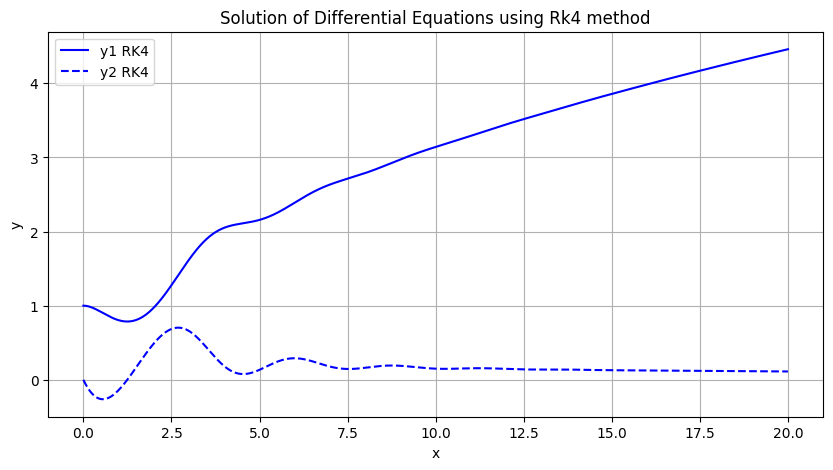

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, x0, y0, h, xmax):
    """ Fourth-Order Runge-Kutta method """
    x = np.arange(x0, xmax + h, h)
    y = np.zeros((len(x), len(y0)))
    y[0, :] = y0
    print(f"Step 0: x = {x[0]:.2f}, y1 = {y[0, 0]:.4f}, y2 = {y[0, 1]:.4f}")

    for i in range(1, len(x)):
        k1 = h * f(x[i-1], y[i-1, :])
        k2 = h * f(x[i-1] + 0.5*h, y[i-1, :] + 0.5*k1)
        k3 = h * f(x[i-1] + 0.5*h, y[i-1, :] + 0.5*k2)
        k4 = h * f(x[i-1] + h, y[i-1, :] + k3)
        y[i, :] = y[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6
        print(f"Step {i}: x = {x[i]:.2f}, y1 = {y[i, 0]:.4f}, y2 = {y[i, 1]:.4f}")

    return x, y

#rk3
def rk3(f, x0, y0, h, xmax):
    """ Third-Order Runge-Kutta method """
    x = np.arange(x0, xmax + h, h)
    y = np.zeros((len(x), len(y0)))
    y[0, :] = y0
    print(f"Step 0: x = {x[0]:.2f}, y1 = {y[0, 0]:.4f}, y2 = {y[0, 1]:.4f}")

    for i in range(1, len(x)):
        k1 = h * f(x[i-1], y[i-1, :])
        k2 = h * f(x[i-1] + 0.5*h, y[i-1, :] + 0.5*k1)
        k3 = h * f(x[i-1] + h, y[i-1, :] - k1 + 2*k2)
        y[i, :] = y[i-1, :] + (k1 + 4*k2 + k3) / 6
        print(f"Step {i}: x = {x[i]:.2f}, y1 = {y[i, 0]:.4f}, y2 = {y[i, 1]:.4f}")

    return x, y

def taylor_method(f, x0, y0, h, xmax):
    """ Simplified Fourth-Order Taylor method (using only first derivative) """
    x = np.arange(x0, xmax + h, h)
    y = np.zeros((len(x), len(y0)))
    y[0, :] = y0
    print(f"Step 0: x = {x[0]:.2f}, y1 = {y[0, 0]:.4f}, y2 = {y[0, 1]:.4f}")

    for i in range(1, len(x)):
        dy = f(x[i-1], y[i-1, :])
        y[i, :] = y[i-1, :] + h * dy
        print(f"Step {i}: x = {x[i]:.2f}, y1 = {y[i, 0]:.4f}, y2 = {y[i, 1]:.4f}")

    return x, y

def system_equations(x, y):
    """ System of first-order ODEs from the given second-order ODE """
    y1, y2 = y
    dy1dx = y2
    dy2dx = x - y2 - y1**2
    return np.array([dy1dx, dy2dx])

def plot_results(x, y_rk4, y_taylor, method):
    plt.figure(figsize=(10, 5))
    if method == 'rk4':
        plt.plot(x, y_rk4[:, 0], label='y1 RK4', linestyle='-', color='blue')
        plt.plot(x, y_rk4[:, 1], label='y2 RK4', linestyle='--', color='blue')
    elif method == 'taylor':
        plt.plot(x, y_taylor[:, 0], label='y1 Taylor', linestyle='-', color='red')
        plt.plot(x, y_taylor[:, 1], label='y2 Taylor', linestyle='--', color='red')
    plt.title(f'Solution of Differential Equations using {method.capitalize()} method')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

method = input("Choose the method (RK4 or Taylor): ").strip().lower()
h = float(input("Enter the step size h: "))
xmax = float(input("Enter the maximum value of x (xmax): "))
x0 = 0
y0 = np.array([1, 0]) 

if method == 'rk4':
    x, y_method = rk4(system_equations, x0, y0, h, xmax)
elif method == 'taylor':
    x, y_method = taylor_method(system_equations, x0, y0, h, xmax)
else:
    raise ValueError("Invalid method selected. Use 'RK4' or 'Taylor'.")

plot_results(x, y_method, y_method, method)
